c:\Users\anton\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"






Epoch 1/5


938/938 [==============================] - 7s 7ms/step - loss: 0.1790 - accuracy: 0.9451 - val_loss: 0.0484 - val_accuracy: 0.9832
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0518 - accuracy: 0.9836 - val_loss: 0.0453 - val_accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0293 - val_accuracy: 0.9902
Epoch 5/5
1/1 [==============================] - 0s 46ms/step


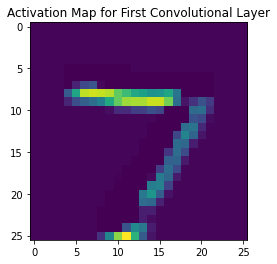

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Charger les données MNIST et les prétraiter
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construire un modèle simple de CNN pour MNIST
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [19]:
activations.shape

(1, 26, 26, 32)

1/1 [==============================] - 0s 26ms/step


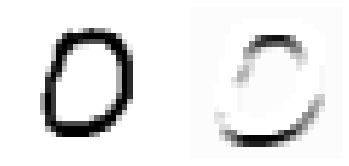

In [30]:
from tensorflow.keras.models import Model

n = 10

# Sélectionner un exemple d'image du jeu de test
example_image = x_test[n].reshape(1, 28, 28, 1)

# Extraire les activations de la première couche convolutive
activation_model = Model(inputs=model.input, outputs=model.layers[0].output)
activations = activation_model.predict(example_image)

# Visualiser les activations avec une carte de chaleur
plt.subplot(121)
plt.imshow(x_test[n],cmap="gray_r")
plt.axis(False)
plt.subplot(122)
plt.imshow(activations[0, :, :, 0], cmap='gray_r')
plt.axis(False)
plt.show()


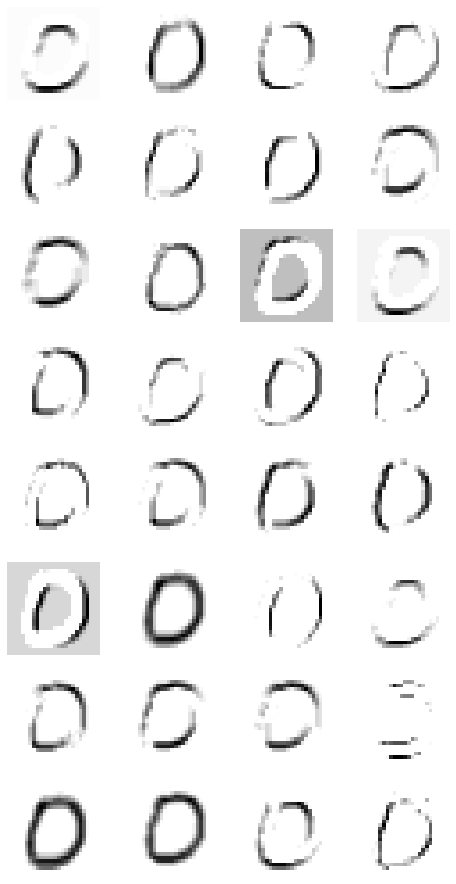

In [28]:
plt.figure(figsize=(8,16))
for a in range(32):
    
    plt.subplot(8,4,a+1)
    plt.imshow(activations[0, :, :, a], cmap='gray')
    plt.axis(False)
